In [39]:
from os import path
from PIL import Image
from colorthief import ColorThief
import matplotlib.pyplot as plt
import numpy as np

In [55]:
def greenness_rgb(color):
    r, g, b = color
    return g/max(1,b) + g/max(1,r)
    #return g/(r + g + b)

greenness_rgb((33, 59, 27))

3.973063973063973

In [114]:
DATAPATH = '../goforest/labeled_images/unlabeled'
#TEST_IMAGE = 'kishan_bagh_nolabels.png' # 2 green shades
#TEST_IMAGE = 'firewood_consumption_nolabels.png' # 1 shade works
TEST_IMAGE = 'rao_jodha1_nolabels.png' # 1 shade works
#TEST_IMAGE = 'auroraville_botanical_gardens_nolabels.png' # Prefer only second
#TEST_IMAGE = 'la_joya_nolabels.png' # 1 green shade


PALETTE_SIZE = 5
MOST_GREEN = 2

[(36, 44, 23), (101, 91, 64), (152, 159, 135), (170, 147, 113), (148, 148, 132)]


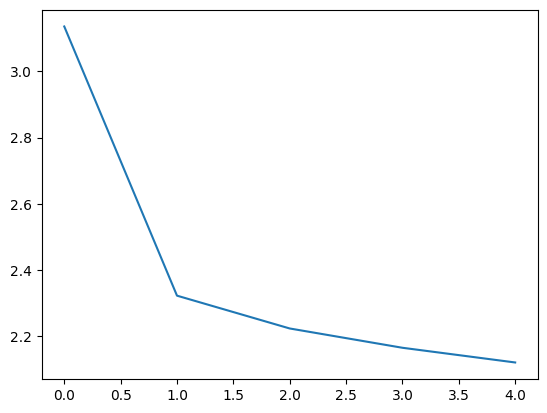

In [115]:
image_path = path.join(DATAPATH, TEST_IMAGE)

image = Image.open(image_path)
ct = ColorThief(image_path)
palette = ct.get_palette(color_count=PALETTE_SIZE)
palette.sort(key = lambda x: greenness_rgb(x), reverse = True)

# This dict will be used to determine which of the MOST_GREEN colors will be used
used_colors = {i: True for i in range(MOST_GREEN)}
for i in range(MOST_GREEN):
    r, g, b = palette[i]
    if r > g or b > g:
        used_colors[i] = False

print(palette)

x = np.arange(0, PALETTE_SIZE, 1)
y = list(map(greenness_rgb, palette))

plt.plot(x, y)
plt.show()

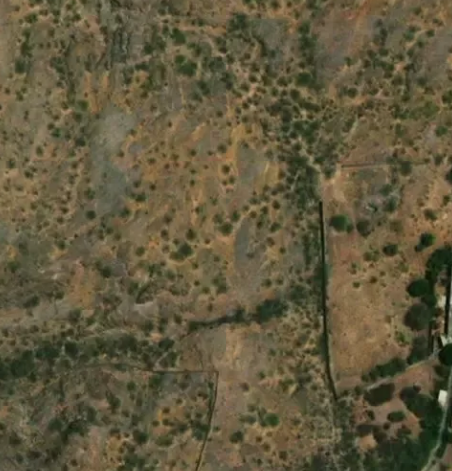

In [116]:
display(image)

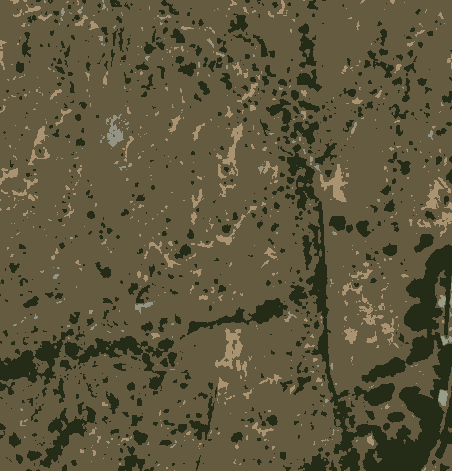

In [117]:
image_copy = image.copy()
image_size = image.width * image.height

for row_nr in range(image_copy.height):
    for col_nr in range(image_copy.width):
        position = (col_nr, row_nr)
        pixel = image.getpixel(position)
        
        norm_func = lambda color: np.linalg.norm(np.array(color) - np.array(pixel))
        best_fit = tuple(palette[np.argmin(np.array(list(map(norm, palette))))])
        
        image_copy.putpixel(position, best_fit)


image_copy.save(TEST_IMAGE + "new.png")
image_to_list = list(image_copy.getdata())

display(image_copy)
    

In [122]:
image_to_list = list(image_copy.getdata())
percentage_list = []

def percentage_crop(percentage):
    string = str(percentage)
    
    if len(string) < 6:
        return string
    else:
        return string[:5]

for i in range(MOST_GREEN):
    if used_colors[i]:
        percentage_list.append(100 * image_to_list.count(palette[i]) / image_size)
        
        print(f'Percentage of palette[{i}]: {percentage_crop(percentage_list[-1])}%')

'''
first_green_percentage = 100 * image_to_list.count(palette[0]) / image_size
secondary_green_percentage = 100 * image_to_list.count(palette[1]) / image_size

print(f'Main green: {first_green_percentage}%')
print(f'Secondary green: {secondary_green_percentage}%')
'''

print(f'Total coverage: {percentage_crop(sum(percentage_list))}%')

Percentage of palette[0]: 16.58%
Total coverage: 16.58%
